# Verteilung der Nutztiere in der Schweiz

## Einlesen der Daten:

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np

### Daten zu Tieren:

In [2]:
tiere = pd.read_excel("TiereEntwicklung.xlsx")

In [3]:
tiere.head(5)

,Art,ID,Ort,1997,2007,2017
0,Betriebe,1,Schweiz,77730,61764,51620
1,Betriebe,2,- Zürich,5024,4155,3432
2,Betriebe,3,>> Bezirk Affoltern,399,329,275
3,Betriebe,4,......0001 Aeugst am Albis,30,18,14
4,Betriebe,5,......0002 Affoltern am Albis,33,28,22


In [4]:
# beim mergen stellt sich später ein Problem mit Horgen raus (neue Nummer durch Gemeindefusion, ich prüfe hier)
tiere[(tiere["Ort"] == "......0295 Horgen")]

,Art,ID,Ort,1997,2007,2017
111,Betriebe,112,......0295 Horgen,83,74,61
2503,Rinder,112,......0295 Horgen,2505,2316,2320
4895,Pferde,112,......0295 Horgen,146,150,148
7287,Schafe,112,......0295 Horgen,254,137,153
9679,Ziegen,112,......0295 Horgen,42,49,31
12071,Schweine,112,......0295 Horgen,676,543,856
14463,Geflügel,112,......0295 Horgen,1426,989,809
16855,Übrige,112,......0295 Horgen,297,182,85


### Daten zur Bevölkerung, inkl. Bereinigung

In [6]:
bevoelkerung = pd.read_excel("BevölkerungEntwicklung.xlsx")
bevoelkerung.head(5)

,Bevölkerung Jahr,Ort,Anzahl
0,1997,Schweiz,7081346
1,1997,- Zürich,1178848
2,1997,>> Bezirk Affoltern,39263
3,1997,......0001 Aeugst am Albis,1431
4,1997,......0002 Affoltern am Albis,9451


In [7]:
bevoelkerung = bevoelkerung.pivot(index='Ort', columns='Bevölkerung Jahr', values='Anzahl')

In [8]:
bevoelkerung.head(5)

Bevölkerung Jahr,1997,2007,2017
Ort,,,
- Aargau,531665,574813,663462
- Appenzell Ausserrhoden,54136,52509,54954
- Appenzell Innerrhoden,14833,15300,16003
- Basel-Landschaft,253911,267166,285624
- Basel-Stadt,194913,184822,193070


In [9]:
bevoelkerung = bevoelkerung.reset_index()

In [10]:
bevoelkerung.columns.name = None

In [11]:
spalten = {
    1997: 'Einwohner 1997',
    2007: 'Einwohner 2007',
    2017: 'Einwohner 2017'
}

In [12]:
bevoelkerung = bevoelkerung.rename(columns=spalten)

In [13]:
bevoelkerung.head(5)

,Ort,Einwohner 1997,Einwohner 2007,Einwohner 2017
0,- Aargau,531665,574813,663462
1,- Appenzell Ausserrhoden,54136,52509,54954
2,- Appenzell Innerrhoden,14833,15300,16003
3,- Basel-Landschaft,253911,267166,285624
4,- Basel-Stadt,194913,184822,193070


In [14]:
# auch hier der Horgen-Test
bevoelkerung[(bevoelkerung["Ort"] == "......0133 Horgen")]

,Ort,Einwohner 1997,Einwohner 2007,Einwohner 2017
121,......0133 Horgen,16535,18074,20291


### Die beiden Tabellen mergen und sinnvoller beschriften:

In [15]:
alle = tiere.merge(bevoelkerung, on='Ort', how='left')
alle.head(5)

,Art,ID,Ort,1997,2007,2017,Einwohner 1997,Einwohner 2007,Einwohner 2017
0,Betriebe,1,Schweiz,77730,61764,51620,7081346.0,7508739.0,8419550.0
1,Betriebe,2,- Zürich,5024,4155,3432,1178848.0,1284052.0,1487969.0
2,Betriebe,3,>> Bezirk Affoltern,399,329,275,39263.0,44635.0,52904.0
3,Betriebe,4,......0001 Aeugst am Albis,30,18,14,1431.0,1645.0,1977.0
4,Betriebe,5,......0002 Affoltern am Albis,33,28,22,9451.0,10302.0,11900.0


In [17]:
#Welche Orte haben keine Einwohner erhalten. Hier u.a. Horgen
alle[(alle["Einwohner 2017"].isnull()) & (alle["Art"] == "Betriebe")]

,Art,ID,Ort,1997,2007,2017,Einwohner 1997,Einwohner 2007,Einwohner 2017
111,Betriebe,112,......0295 Horgen,83,74,61,NaN,NaN,NaN
164,Betriebe,165,......0294 Elgg,54,47,37,NaN,NaN,NaN
1146,Betriebe,1147,>> Kanton Appenzell Innerrhoden,698,567,465,NaN,NaN,NaN
1246,Betriebe,1247,......3544 Bergün Filisur,23,20,18,NaN,NaN,NaN
1250,Betriebe,1251,>> Region Engiadina Bassa / Val Müstair,319,258,215,NaN,NaN,NaN
1306,Betriebe,1307,>> Region Prättigau / Davos,694,521,414,NaN,NaN,NaN
2254,Betriebe,2255,>> Canton de Neuchâtel,1288,976,807,NaN,NaN,NaN
2261,Betriebe,2262,......6417 La Grande-Béroche,100,80,63,NaN,NaN,NaN


In [18]:
alle.rename(columns={"1997": "Tiere 1997", "2007": "Tiere 2007", "2017": "Tiere 2017"}, inplace=True)

In [19]:
alle.head(5)

,Art,ID,Ort,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017
0,Betriebe,1,Schweiz,77730,61764,51620,7081346.0,7508739.0,8419550.0
1,Betriebe,2,- Zürich,5024,4155,3432,1178848.0,1284052.0,1487969.0
2,Betriebe,3,>> Bezirk Affoltern,399,329,275,39263.0,44635.0,52904.0
3,Betriebe,4,......0001 Aeugst am Albis,30,18,14,1431.0,1645.0,1977.0
4,Betriebe,5,......0002 Affoltern am Albis,33,28,22,9451.0,10302.0,11900.0


### File speichern als .csv:

In [20]:
alle.to_csv('einwohnerfehlen.csv')

### mit kompletten Einwohnerdaten wieder hochladen:

In [23]:
# Da es wenige Orte ohne Einwohner waren, erfasse ich dich kurz im Excel und lade wieder hoch
alle = pd.read_csv("nutztieremitalleneinwohnern.csv")

In [24]:
# jetzt stimmts, alle haben Einwohner
alle[(alle["Einwohner 2017"].isnull())]

,Unnamed: 0,Art,ID,Ort,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017


### Spalten sinnvoller anordnen: 

In [25]:
alle = alle[["ID", "Ort", "Art", "Tiere 1997", "Tiere 2007", "Tiere 2017", "Einwohner 1997", "Einwohner 2007", "Einwohner 2017"]]

In [26]:
alle.head(5)

,ID,Ort,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017
0,1,Schweiz,Betriebe,77730,61764,51620,7081346,7508739,8419550
1,2,- Zürich,Betriebe,5024,4155,3432,1178848,1284052,1487969
2,3,>> Bezirk Affoltern,Betriebe,399,329,275,39263,44635,52904
3,4,......0001 Aeugst am Albis,Betriebe,30,18,14,1431,1645,1977
4,5,......0002 Affoltern am Albis,Betriebe,33,28,22,9451,10302,11900


### Namen bereinigen, Einheit für Orte zuteilen:

In [27]:
alle["Ort"]

0                              Schweiz
1                             - Zürich
2                  >> Bezirk Affoltern
3           ......0001 Aeugst am Albis
4        ......0002 Affoltern am Albis
5                ......0003 Bonstetten
6           ......0004 Hausen am Albis
7                  ......0005 Hedingen
8           ......0006 Kappel am Albis
9                    ......0007 Knonau
10              ......0008 Maschwanden
11           ......0009 Mettmenstetten
12                 ......0010 Obfelden
13                ......0011 Ottenbach
14               ......0012 Rifferswil
15                ......0013 Stallikon
16        ......0014 Wettswil am Albis
17               >> Bezirk Andelfingen
18                  ......0021 Adlikon
19              ......0022 Benken (ZH)
20           ......0023 Berg am Irchel
21           ......0024 Buch am Irchel
22                  ......0025 Dachsen
23                     ......0026 Dorf
24              ......0027 Feuerthalen
25                   ....

In [28]:
# Test für Gemeinde
re.search(r"^\.{6}\d{4} .+$", "......0001 Aeugst am Albis")

<re.Match object; span=(0, 26), match='......0001 Aeugst am Albis'>

In [30]:
# Test für Bezirke
re.search(r"^>> .+$", ">> Wahlkreis Luzern-Stadt")

<re.Match object; span=(0, 25), match='>> Wahlkreis Luzern-Stadt'>

In [31]:
# Test für Kantone
re.search(r"^- .+$", "- Aargau")

<re.Match object; span=(0, 8), match='- Aargau'>

In [32]:
# Test für Land
re.search(r"Schweiz", "Schweiz")

<re.Match object; span=(0, 7), match='Schweiz'>

### Testen, ob Gemeinden auch als Gemeinden erkannt werden:

In [33]:
alle["Ort"].str.contains(r"^\.{6}\d{4} .+$")

0        False
1        False
2        False
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17       False
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
19106     True
19107     True
19108     True
19109     True
19110     True
19111     True
19112     True
19113     True
19114    False
19115     True
19116     True
19117     True
19118     True
19119     True
19120     True
19121     True
19122     True
19123     True
19124     True
19125     True
19126     True
19127     True
19128     True
19129     True
19130     True
19131     True
19132     True
19133     True
19134     True
19135     True
Name: Ort, Length: 19136, dtype: bool

### Neue Spalte mit Einheit für Gemeinden, Bezirke, Kantone, Land: 

In [34]:
alle.loc[alle['Ort'].str.contains(r"^\.{6}\d{4} .+$"), 'Einheitstyp'] = "Gemeinde"
alle.loc[alle['Ort'].str.contains(r"^>> .+$"), 'Einheitstyp'] = "Bezirk"
alle.loc[alle['Ort'].str.contains(r"^- .+$"), 'Einheitstyp'] = "Kanton"
alle.loc[alle['Ort'].str.contains(r"Schweiz"), 'Einheitstyp'] = "Land"

In [35]:
alle

,ID,Ort,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Einheitstyp
0,1,Schweiz,Betriebe,77730,61764,51620,7081346,7508739,8419550,Land
1,2,- Zürich,Betriebe,5024,4155,3432,1178848,1284052,1487969,Kanton
2,3,>> Bezirk Affoltern,Betriebe,399,329,275,39263,44635,52904,Bezirk
3,4,......0001 Aeugst am Albis,Betriebe,30,18,14,1431,1645,1977,Gemeinde
4,5,......0002 Affoltern am Albis,Betriebe,33,28,22,9451,10302,11900,Gemeinde
5,6,......0003 Bonstetten,Betriebe,22,19,14,3561,4612,5435,Gemeinde
6,7,......0004 Hausen am Albis,Betriebe,51,45,35,3034,3256,3571,Gemeinde
7,8,......0005 Hedingen,Betriebe,17,13,11,2802,3307,3687,Gemeinde
8,9,......0006 Kappel am Albis,Betriebe,27,26,22,855,857,1110,Gemeinde
9,10,......0007 Knonau,Betriebe,27,27,25,1228,1583,2168,Gemeinde


### Einheitsnummer der Gemeinden beibehalten in neuer Spalte:

In [36]:
alle['Ort'].str.extract(r"^\.{6}(\d{4}) .+$")

,0
0,NaN
1,NaN
2,NaN
3,0001
4,0002
5,0003
6,0004
7,0005
8,0006
9,0007


In [37]:
alle['Ortsnummer'] = alle['Ort'].str.extract(r"^\.{6}(\d{4}) .+$")
alle.head(30)

,ID,Ort,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Einheitstyp,Ortsnummer
0,1,Schweiz,Betriebe,77730,61764,51620,7081346,7508739,8419550,Land,NaN
1,2,- Zürich,Betriebe,5024,4155,3432,1178848,1284052,1487969,Kanton,NaN
2,3,>> Bezirk Affoltern,Betriebe,399,329,275,39263,44635,52904,Bezirk,NaN
3,4,......0001 Aeugst am Albis,Betriebe,30,18,14,1431,1645,1977,Gemeinde,0001
4,5,......0002 Affoltern am Albis,Betriebe,33,28,22,9451,10302,11900,Gemeinde,0002
5,6,......0003 Bonstetten,Betriebe,22,19,14,3561,4612,5435,Gemeinde,0003
6,7,......0004 Hausen am Albis,Betriebe,51,45,35,3034,3256,3571,Gemeinde,0004
7,8,......0005 Hedingen,Betriebe,17,13,11,2802,3307,3687,Gemeinde,0005
8,9,......0006 Kappel am Albis,Betriebe,27,26,22,855,857,1110,Gemeinde,0006
9,10,......0007 Knonau,Betriebe,27,27,25,1228,1583,2168,Gemeinde,0007


### Ortsname bestimmen/anpassen:

In [38]:
alle['Ortsname'] = alle['Ort']

In [39]:
#Gemeinden
alle["Ortsname"] = alle['Ortsname'].str.replace(r"^\.{6}\d{4} ", "")

In [40]:
#Bezirke
alle["Ortsname"] = alle['Ortsname'].str.replace(r"^>> ", "")

In [41]:
#Kantone
alle["Ortsname"] = alle['Ortsname'].str.replace(r"^- ", "")

In [42]:
alle.head(5)

,ID,Ort,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Einheitstyp,Ortsnummer,Ortsname
0,1,Schweiz,Betriebe,77730,61764,51620,7081346,7508739,8419550,Land,NaN,Schweiz
1,2,- Zürich,Betriebe,5024,4155,3432,1178848,1284052,1487969,Kanton,NaN,Zürich
2,3,>> Bezirk Affoltern,Betriebe,399,329,275,39263,44635,52904,Bezirk,NaN,Bezirk Affoltern
3,4,......0001 Aeugst am Albis,Betriebe,30,18,14,1431,1645,1977,Gemeinde,0001,Aeugst am Albis
4,5,......0002 Affoltern am Albis,Betriebe,33,28,22,9451,10302,11900,Gemeinde,0002,Affoltern am Albis


### Nur noch Angaben, die ich brauche anzeigen:


In [43]:
alle = alle[["Ortsname", "Einheitstyp", "Art", "Tiere 1997", "Tiere 2007", "Tiere 2017", "Einwohner 1997", "Einwohner 2007", "Einwohner 2017", "Ortsnummer"]]

In [44]:
alle.head(5)

,Ortsname,Einheitstyp,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Ortsnummer
0,Schweiz,Land,Betriebe,77730,61764,51620,7081346,7508739,8419550,NaN
1,Zürich,Kanton,Betriebe,5024,4155,3432,1178848,1284052,1487969,NaN
2,Bezirk Affoltern,Bezirk,Betriebe,399,329,275,39263,44635,52904,NaN
3,Aeugst am Albis,Gemeinde,Betriebe,30,18,14,1431,1645,1977,0001
4,Affoltern am Albis,Gemeinde,Betriebe,33,28,22,9451,10302,11900,0002


### File speichern als .csv:

In [46]:
#Sammlung und Bereinigung ist beendet. Ich speichere, um später hier direkt starten zu können
alle.to_csv('nutztiereschweizfertig.csv')

## File für Berechnungen vorbereiten:

### Anteil Tiere/Betriebe pro Einwohner:

In [51]:
alle['Anteil 2017'] = (alle['Einwohner 2017'] / alle['Tiere 2017']).round(2)

In [52]:
alle['Anteil 2007'] = (alle['Einwohner 2007'] / alle['Tiere 2007']).round(2)

In [53]:
alle['Anteil 1997'] = (alle['Einwohner 1997'] / alle['Tiere 1997']).round(2)

In [54]:
alle

,Ortsname,Einheitstyp,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Ortsnummer,Anteil 2017,Anteil 2007,Anteil 1997
0,Schweiz,Land,Betriebe,77730,61764,51620,7081346,7508739,8419550,NaN,163.110000,121.57,91.100000
1,Zürich,Kanton,Betriebe,5024,4155,3432,1178848,1284052,1487969,NaN,433.560000,309.04,234.640000
2,Bezirk Affoltern,Bezirk,Betriebe,399,329,275,39263,44635,52904,NaN,192.380000,135.67,98.400000
3,Aeugst am Albis,Gemeinde,Betriebe,30,18,14,1431,1645,1977,0001,141.210000,91.39,47.700000
4,Affoltern am Albis,Gemeinde,Betriebe,33,28,22,9451,10302,11900,0002,540.910000,367.93,286.390000
5,Bonstetten,Gemeinde,Betriebe,22,19,14,3561,4612,5435,0003,388.210000,242.74,161.860000
6,Hausen am Albis,Gemeinde,Betriebe,51,45,35,3034,3256,3571,0004,102.030000,72.36,59.490000
7,Hedingen,Gemeinde,Betriebe,17,13,11,2802,3307,3687,0005,335.180000,254.38,164.820000
8,Kappel am Albis,Gemeinde,Betriebe,27,26,22,855,857,1110,0006,50.450000,32.96,31.670000
9,Knonau,Gemeinde,Betriebe,27,27,25,1228,1583,2168,0007,86.720000,58.63,45.480000


## Auswertungen

### Einzelabfrage / zum Testen

In [55]:
#Abfrage pro Gemeinde
alle[(alle["Ortsname"] == "Beromünster") & (alle["Art"] == "Schweine")]

,Ortsname,Einheitstyp,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Ortsnummer,Anteil 2017,Anteil 2007,Anteil 1997
12535,Beromünster,Gemeinde,Schweine,2692,2442,23667,5417,5483,6517,1081,0.28,2.25,2.01


In [57]:
#mehr Tiere als Menschen
alle[(alle["Einheitstyp"] == "Gemeinde") & (alle["Art"] == "Schweine") & (alle["Anteil 2017"] < 1)].sort_values("Anteil 2017", ascending=True)

,Ortsname,Einheitstyp,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Ortsnummer,Anteil 2017,Anteil 2007,Anteil 1997
12310,Rumendingen,Gemeinde,Schweine,516,989,1309,107,85,81,0421,0.06,0.090000,0.210000
13594,Raperswilen,Gemeinde,Schweine,3953,4623,4865,451,399,391,4846,0.08,0.090000,0.110000
12559,Ebersecken,Gemeinde,Schweine,4124,6040,4624,419,423,395,1126,0.09,0.070000,0.100000
12564,Grossdietwil,Gemeinde,Schweine,4383,7061,9553,903,782,838,1131,0.09,0.110000,0.210000
12172,Schelten,Gemeinde,Schweine,8,277,375,51,50,37,0708,0.10,0.180000,6.380000
13068,Beggingen,Gemeinde,Schweine,1469,2734,3984,534,514,476,2951,0.12,0.190000,0.360000
12294,Alchenstorf,Gemeinde,Schweine,1167,2256,4838,542,553,589,0402,0.12,0.250000,0.460000
12272,Berken,Gemeinde,Schweine,172,465,332,58,51,43,0972,0.13,0.110000,0.340000
14329,Soubey,Gemeinde,Schweine,282,648,865,151,150,134,6759,0.15,0.230000,0.540000
12573,Ufhusen,Gemeinde,Schweine,3097,5798,6123,826,829,891,1145,0.15,0.140000,0.270000


### Erstellen der Variablen für einzelne Tierarten/Betriebe:

In [62]:
# meiste Betriebe pro Einwohner
betriebe = alle[(alle["Einheitstyp"] == "Gemeinde") & (alle["Art"] == "Betriebe")].sort_values("Tiere 2017", ascending=False)
betriebe.head(5)

,Ortsname,Einheitstyp,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Ortsnummer,Anteil 2017,Anteil 2007,Anteil 1997
626,Escholzmatt-Marbach,Gemeinde,Betriebe,385,322,272,4712,4366,4358,1010,16.02,13.56,12.24
498,Frutigen,Gemeinde,Betriebe,298,227,196,6599,6688,6894,0563,35.17,29.46,22.14
588,Ruswil,Gemeinde,Betriebe,236,212,195,6120,6364,6908,1098,35.43,30.02,25.93
358,Eggiwil,Gemeinde,Betriebe,264,220,189,2651,2497,2458,0901,13.01,11.35,10.04
438,Schwarzenburg,Gemeinde,Betriebe,258,215,187,6511,6720,6887,0855,36.83,31.26,25.24


In [61]:
# meiste Rinder pro Einwohner
rinder = alle[(alle["Einheitstyp"] == "Gemeinde") & (alle["Art"] == "Rinder")].sort_values("Tiere 2017", ascending=False)
rinder.head(5)

,Ortsname,Einheitstyp,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Ortsnummer,Anteil 2017,Anteil 2007,Anteil 1997
3018,Escholzmatt-Marbach,Gemeinde,Rinder,7880,8242,7678,4712,4366,4358,1010,0.57,0.53,0.60
2980,Ruswil,Gemeinde,Rinder,6859,6917,7503,6120,6364,6908,1098,0.92,0.92,0.89
4677,Val-de-Travers,Gemeinde,Rinder,6699,6550,6797,11034,10870,10950,6512,1.61,1.66,1.65
4674,Val-de-Ruz,Gemeinde,Rinder,7425,6327,6533,13339,14811,16832,6487,2.58,2.34,1.80
2830,Schwarzenburg,Gemeinde,Rinder,6036,5993,5822,6511,6720,6887,0855,1.18,1.12,1.08


In [63]:
# meiste Geflügel pro Einwohner
geflügel = alle[(alle["Einheitstyp"] == "Gemeinde") & (alle["Art"] == "Geflügel")].sort_values("Tiere 2017", ascending=False)
geflügel.head(5)

,Ortsname,Einheitstyp,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Ortsnummer,Anteil 2017,Anteil 2007,Anteil 1997
15088,Montagny (FR),Gemeinde,Geflügel,8294,29550,261447,1746,1965,2404,2029,0.01,0.070000,0.210000
15198,Düdingen,Gemeinde,Geflügel,64745,82485,116752,6601,7136,7825,2293,0.07,0.090000,0.100000
16525,Saillon,Gemeinde,Geflügel,0,0,113689,1455,1810,2541,6140,0.02,inf,inf
14927,Beromünster,Gemeinde,Geflügel,451,339,91581,5417,5483,6517,1081,0.07,16.170000,12.010000
15876,Sins,Gemeinde,Geflügel,28680,31199,78681,3138,3583,4302,4239,0.05,0.110000,0.110000


In [65]:
# meiste Pferde pro Einwohner
pferde = alle[(alle["Einheitstyp"] == "Gemeinde") & (alle["Art"] == "Pferde")].sort_values("Tiere 2017", ascending=False)
pferde.head(5)

,Ortsname,Einheitstyp,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Ortsnummer,Anteil 2017,Anteil 2007,Anteil 1997
7174,Haute-Ajoie,Gemeinde,Pferde,444,780,598,1032,1016,941,6809,1.57,1.30,2.32
7066,Val-de-Ruz,Gemeinde,Pferde,185,394,390,13339,14811,16832,6487,43.16,37.59,72.10
5436,Einsiedeln,Gemeinde,Pferde,156,260,314,11847,13549,15361,1301,48.92,52.11,75.94
5962,Diepoldsau,Gemeinde,Pferde,227,233,300,4584,5556,6456,3234,21.52,23.85,20.19
5222,Schwarzenburg,Gemeinde,Pferde,252,282,282,6511,6720,6887,0855,24.42,23.83,25.84


In [66]:
# meiste Schafe pro Einwohner
schafe = alle[(alle["Einheitstyp"] == "Gemeinde") & (alle["Art"] == "Schafe")].sort_values("Tiere 2017", ascending=False)
schafe.head(5)

,Ortsname,Einheitstyp,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Ortsnummer,Anteil 2017,Anteil 2007,Anteil 1997
8429,Scuol,Gemeinde,Schafe,4830,5381,3780,4410,4406,4638,3762,1.23,0.82,0.91
9293,Naters,Gemeinde,Schafe,6641,5701,3473,8408,8565,9951,6007,2.87,1.50,1.27
7614,Schwarzenburg,Gemeinde,Schafe,1250,2568,2952,6511,6720,6887,0855,2.33,2.62,5.21
8361,Oberriet (SG),Gemeinde,Schafe,2479,3084,2886,7408,7816,8811,3254,3.05,2.53,2.99
7626,Rüeggisberg,Gemeinde,Schafe,752,1939,2476,2038,1883,1819,0880,0.73,0.97,2.71


In [67]:
# meiste Ziegen pro Einwohner
ziegen = alle[(alle["Einheitstyp"] == "Gemeinde") & (alle["Art"] == "Ziegen")].sort_values("Tiere 2017", ascending=False)
ziegen.head(5)

,Ortsname,Einheitstyp,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Ortsnummer,Anteil 2017,Anteil 2007,Anteil 1997
11350,Biasca,Gemeinde,Ziegen,809,1047,960,6077,5914,6176,5281,6.43,5.65,7.51
11248,Serravalle,Gemeinde,Ziegen,629,763,813,1773,1994,2101,5050,2.58,2.61,2.82
11240,Bellinzona,Gemeinde,Ziegen,426,1035,706,36005,38747,42901,5002,60.77,37.44,84.52
11908,Courroux,Gemeinde,Ziegen,81,345,693,2683,2984,3256,6709,4.70,8.65,33.12
10276,Wolfenschiessen,Gemeinde,Ziegen,303,550,688,2001,1975,2136,1511,3.10,3.59,6.60


In [68]:
# meiste Schweine pro Einwohner
schweine = alle[(alle["Einheitstyp"] == "Gemeinde") & (alle["Art"] == "Schweine")].sort_values("Tiere 2017", ascending=False)
schweine.head(5)

,Ortsname,Einheitstyp,Art,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Ortsnummer,Anteil 2017,Anteil 2007,Anteil 1997
12548,Ruswil,Gemeinde,Schweine,24597,29620,33357,6120,6364,6908,1098,0.21,0.21,0.25
12535,Beromünster,Gemeinde,Schweine,2692,2442,23667,5417,5483,6517,1081,0.28,2.25,2.01
12540,Grosswangen,Gemeinde,Schweine,12437,18601,19828,2617,2871,3162,1086,0.16,0.15,0.21
12577,Willisau,Gemeinde,Schweine,12235,14516,14596,6983,7137,7777,1151,0.53,0.49,0.57
12561,Ettiswil,Gemeinde,Schweine,7164,12687,14181,2088,2213,2718,1128,0.19,0.17,0.29


### Zusammenfassung der Kategorien Ziegen und Schafe, Bereinigung:

In [75]:
# Ich fasse Ziegen und Schafe als eine Kategorie zusammen, da Verteilung ähnlich
ziegenschafe = alle[~(alle["Art"] == "Betriebe") & ~(alle["Art"] == "Übrige") & ~(alle["Art"] == "Rinder") & ~(alle["Art"] == "Pferde") & ~(alle["Art"] == "Schweine") & ~(alle["Art"] == "Geflügel")].groupby(["Ortsname", "Einheitstyp"]).sum()
ziegenschafe.head(5)

,,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Anteil 2017,Anteil 2007,Anteil 1997
Ortsname,Einheitstyp,,,,,,,,,
Aadorf,Gemeinde,46,253,1263,14398,14916,17730,2223.29,133.730000,630.770000
Aarau,Gemeinde,0,118,30,36890,36648,42072,7791.11,3826.960000,inf
Aarberg,Gemeinde,36,201,73,6832,7908,9054,322.09,585.240000,1808.470000
Aarburg,Gemeinde,3,5,11,12556,13112,15708,3085.50,inf,inf
Aargau,Kanton,15948,25198,19884,1063330,1149626,1326924,369.00,286.040000,642.200000


In [76]:
ziegenschafe['Einwohner 2017'] = ziegenschafe['Einwohner 2017'] / 2
ziegenschafe['Einwohner 2007'] = ziegenschafe['Einwohner 2007'] / 2
ziegenschafe['Einwohner 1997'] = ziegenschafe['Einwohner 1997'] / 2

In [77]:
#Totalanteil berechnen
ziegenschafe['Totalanteil 2017'] = (ziegenschafe['Einwohner 2017'] / ziegenschafe['Tiere 2017']).round(2)

In [78]:
ziegenschafe = ziegenschafe.reset_index()

In [80]:
ziegenschafe = ziegenschafe[(ziegenschafe["Einheitstyp"] == "Gemeinde")].sort_values("Tiere 2017", ascending=False)
ziegenschafe.head(5)

,Ortsname,Einheitstyp,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Anteil 2017,Anteil 2007,Anteil 1997,Totalanteil 2017
1906,Scuol,Gemeinde,5202,5768,4055,4410.0,4406.0,4638.0,18.10,12.21,12.76,1.14
1444,Naters,Gemeinde,7483,6543,3944,8408.0,8565.0,9951.0,24.00,11.67,11.26,2.52
1885,Schwarzenburg,Gemeinde,1441,2762,3208,6511.0,6720.0,6887.0,29.23,37.26,39.30,2.15
776,Flums,Gemeinde,2637,2966,3025,4916.0,4889.0,4919.0,10.63,14.62,21.05,1.63
1528,Oberriet (SG),Gemeinde,2519,3125,2985,7408.0,7816.0,8811.0,92.05,193.16,188.19,2.95


In [81]:
# Berechnungen Ziegen und Schafe für "In Kürze"-Grafik
ziegenschafe[(ziegenschafe["Einheitstyp"] == "Gemeinde") & (ziegenschafe["Anteil 2017"] < 1)].sort_values("Totalanteil 2017", ascending=True)

,Ortsname,Einheitstyp,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Anteil 2017,Anteil 2007,Anteil 1997,Totalanteil 2017
434,Cerentino,Gemeinde,447,516,415,53.0,65.0,51.0,0.49,0.51,0.48,0.12


## Total Nutztiere pro Ort


### Erstellen und Bereinigen des Dataframes für alle Tiere zusammen:

In [87]:
totaltiere = alle[~(alle["Art"] == "Betriebe") & ~(alle["Art"] == "Übrige")].groupby(["Ortsname", "Einheitstyp"]).sum()

In [88]:
totaltiere.head(5)

,,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Anteil 2017,Anteil 2007,Anteil 1997
Ortsname,Einheitstyp,,,,,,,,,
Aadorf,Gemeinde,7039,9126,7299,43194,44748,53190,2.352030e+03,215.490000,710.460000
Aarau,Gemeinde,348,751,474,110670,109944,126216,1.231455e+04,5141.130000,inf
Aarberg,Gemeinde,1970,2242,1331,20496,23724,27162,5.474500e+02,711.330000,1910.520000
Aarburg,Gemeinde,336,285,424,37668,39336,47124,inf,inf,inf
Aargau,Kanton,749919,967682,1245256,3189990,3448878,3980772,4.887200e+02,399.610000,784.790000


In [89]:
totaltiere['Einwohner 2017'] = totaltiere['Einwohner 2017'] / 6
totaltiere['Einwohner 2007'] = totaltiere['Einwohner 2007'] / 6
totaltiere['Einwohner 1997'] = totaltiere['Einwohner 1997'] / 6

In [90]:
#Totalanteil berechnen
totaltiere['Totalanteil 2017'] = (totaltiere['Einwohner 2017'] / totaltiere['Tiere 2017']).round(2)

In [91]:
totaltiere = totaltiere.reset_index()

In [92]:
totaltiere.head(5)

,Ortsname,Einheitstyp,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Anteil 2017,Anteil 2007,Anteil 1997,Totalanteil 2017
0,Aadorf,Gemeinde,7039,9126,7299,7199.0,7458.0,8865.0,2.352030e+03,215.490000,710.460000,1.21
1,Aarau,Gemeinde,348,751,474,18445.0,18324.0,21036.0,1.231455e+04,5141.130000,inf,44.38
2,Aarberg,Gemeinde,1970,2242,1331,3416.0,3954.0,4527.0,5.474500e+02,711.330000,1910.520000,3.40
3,Aarburg,Gemeinde,336,285,424,6278.0,6556.0,7854.0,inf,inf,inf,18.52
4,Aargau,Kanton,749919,967682,1245256,531665.0,574813.0,663462.0,4.887200e+02,399.610000,784.790000,0.53


In [94]:
#TESTZEILE: Wo hat es anteilmässig am meisten Tiere und wie viele Gemeinden haben total mehr Tiere als Einwohner?
totaltiere[(totaltiere["Einheitstyp"] == "Gemeinde") & (totaltiere["Totalanteil 2017"] < 1)].sort_values("Totalanteil 2017", ascending=True)

,Ortsname,Einheitstyp,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Anteil 2017,Anteil 2007,Anteil 1997,Totalanteil 2017
2195,Villars-le-Comte,Gemeinde,2364,29540,36885,131.0,145.0,143.0,inf,inf,inf,0.00
647,Démoret,Gemeinde,13059,19827,27768,125.0,122.0,126.0,inf,76.230000,inf,0.00
452,Chavannes-le-Veyron,Gemeinde,2183,13522,28429,122.0,121.0,143.0,inf,inf,inf,0.01
1761,Rovray,Gemeinde,7930,22707,31141,194.0,138.0,171.0,inf,175.600000,253.970000,0.01
1377,Montagny (FR),Gemeinde,10442,32402,263980,1746.0,1965.0,2404.0,171.430000,180.740000,677.630000,0.01
1792,Rüti bei Lyssach,Gemeinde,591,13836,13066,161.0,151.0,161.0,inf,inf,inf,0.01
454,Chavannes-sur-Moudon,Gemeinde,5673,6147,15352,203.0,208.0,223.0,inf,70.460000,161.610000,0.01
874,Grandevent,Gemeinde,122,97,20106,129.0,176.0,232.0,inf,inf,inf,0.01
320,Bourrignon,Gemeinde,9758,7641,27836,296.0,290.0,267.0,37.150000,103.470000,inf,0.01
856,Golaten,Gemeinde,49538,51493,33238,335.0,299.0,309.0,inf,inf,inf,0.01


In [96]:
#TESTZEILE:
totaltiere = totaltiere[(totaltiere["Einheitstyp"] == "Gemeinde")].sort_values("Tiere 2017", ascending=False)
totaltiere.head(5)

,Ortsname,Einheitstyp,Tiere 1997,Tiere 2007,Tiere 2017,Einwohner 1997,Einwohner 2007,Einwohner 2017,Anteil 2017,Anteil 2007,Anteil 1997,Totalanteil 2017
1377,Montagny (FR),Gemeinde,10442,32402,263980,1746.0,1965.0,2404.0,171.430000,180.740000,677.630000,0.01
651,Düdingen,Gemeinde,71156,88558,121970,6601.0,7136.0,7825.0,423.300000,994.300000,1190.860000,0.06
182,Beromünster,Gemeinde,4199,3835,121756,5417.0,5483.0,6517.0,105.730000,832.570000,1104.690000,0.05
1771,Ruswil,Gemeinde,50505,106863,120002,6120.0,6364.0,6908.0,157.190000,127.640000,192.590000,0.06
1808,Saillon,Gemeinde,328,192,113856,1455.0,1810.0,2541.0,inf,inf,inf,0.02


### Files auf benötigte Angaben kürzen und als CSV-speichern

In [97]:
#Betriebe:
betriebeprogemeinde = betriebe[["Ortsname", "Art", "Tiere 2017", "Einwohner 2017", "Anteil 2017"]]
betriebeprogemeinde.to_csv('betriebeprogemeinde.csv')

In [98]:
#Total Tiere:
totaltiereprogemeinde = totaltiere[["Ortsname", "Tiere 2017", "Einwohner 2017", "Totalanteil 2017"]]
totaltiereprogemeinde.to_csv('totaltiereprogemeinde.csv')

In [99]:
#Rinder:
rinderprogemeinde = rinder[["Ortsname", "Art", "Tiere 2017", "Einwohner 2017", "Anteil 2017"]]
rinderprogemeinde.to_csv('rinderprogemeinde.csv')

In [100]:
#Pferde:
pferdeprogemeinde = pferde[["Ortsname", "Art", "Tiere 2017", "Einwohner 2017", "Anteil 2017"]]
pferdeprogemeinde.to_csv('pferdeprogemeinde.csv')

In [101]:
#Schafe:
schafeprogemeinde = schafe[["Ortsname", "Art", "Tiere 2017", "Einwohner 2017", "Anteil 2017"]]
schafeprogemeinde.to_csv('schafeprogemeinde.csv')

In [102]:
#Ziegen:
ziegenprogemeinde = ziegen[["Ortsname", "Art", "Tiere 2017", "Einwohner 2017", "Anteil 2017"]]
ziegenprogemeinde.to_csv('ziegenprogemeinde.csv')

In [103]:
#Schafe und Ziegen:
ziegenschafeprogemeinde = ziegenschafe[["Ortsname", "Tiere 2017", "Einwohner 2017", "Totalanteil 2017"]]
ziegenschafeprogemeinde.to_csv('ziegenschafeprogemeinde.csv')

In [104]:
#Schweine:
schweineprogemeinde = schweine[["Ortsname", "Art", "Tiere 2017", "Einwohner 2017", "Anteil 2017"]]
schweineprogemeinde.to_csv('schweineprogemeinde.csv')

In [105]:
#Geflügel:
geflügelprogemeinde = geflügel[["Ortsname", "Art", "Tiere 2017", "Einwohner 2017", "Anteil 2017"]]
geflügelprogemeinde.to_csv('geflügelprogemeinde.csv')

# Geopandas:

Alles importieren:

In [106]:
import geopandas as gpd
%matplotlib inline
import pysal
import shapely.geometry
from shapely.geometry import Point, Polygon

/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


### Shapefile der Schweizer Gemeinden hochalden:

In [107]:
ch = gpd.read_file("shp/g1g17.shp")

In [108]:
ch = ch.dropna()

In [109]:
ch.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2258 entries, 0 to 2257
Data columns (total 24 columns):
GMDNR       2258 non-null int64
GMDNAME     2258 non-null object
BZNR        2258 non-null int64
KTNR        2258 non-null int64
GRNR        2258 non-null int64
AREA_HA     2258 non-null int64
X_MIN       2258 non-null int64
X_MAX       2258 non-null int64
Y_MIN       2258 non-null int64
Y_MAX       2258 non-null int64
X_CNTR      2258 non-null int64
Y_CNTR      2258 non-null int64
Z_MIN       2258 non-null int64
Z_MAX       2258 non-null int64
Z_AVG       2258 non-null int64
Z_MED       2258 non-null int64
Z_CNTR      2258 non-null int64
E_MIN       2258 non-null int64
E_MAX       2258 non-null int64
N_MIN       2258 non-null int64
N_MAX       2258 non-null int64
E_CNTR      2258 non-null int64
N_CNTR      2258 non-null int64
geometry    2258 non-null object
dtypes: int64(22), object(2)
memory usage: 441.0+ KB


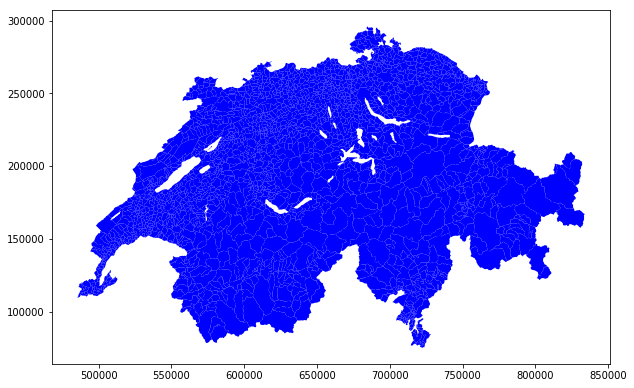

In [110]:
ch.plot(figsize=(10,10), color='blue')
plt.savefig('switzerland.pdf')

### Alle Dataframes anzeigen und entscheiden, was für die Story taugt, was nicht:

/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


Text(0.5, 1.0, 'Betriebe pro Gemeinde')

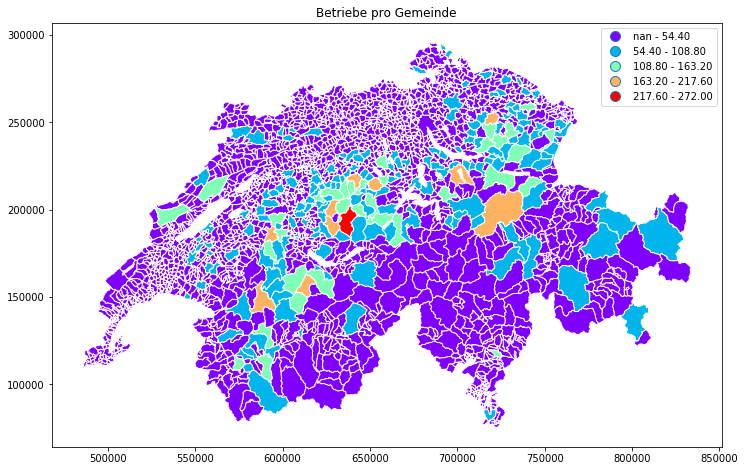

In [111]:
#Betriebe
allebetriebe = ch.merge(betriebe, how='left', left_on='GMDNAME', right_on="Ortsname")

ax = allebetriebe.plot(column='Tiere 2017', cmap='rainbow', scheme='equal_interval', edgecolor='white', legend=True, figsize=(12,12))
ax.set_title('Betriebe pro Gemeinde')

/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


Text(0.5, 1.0, 'Totaltiere pro Gemeinde')

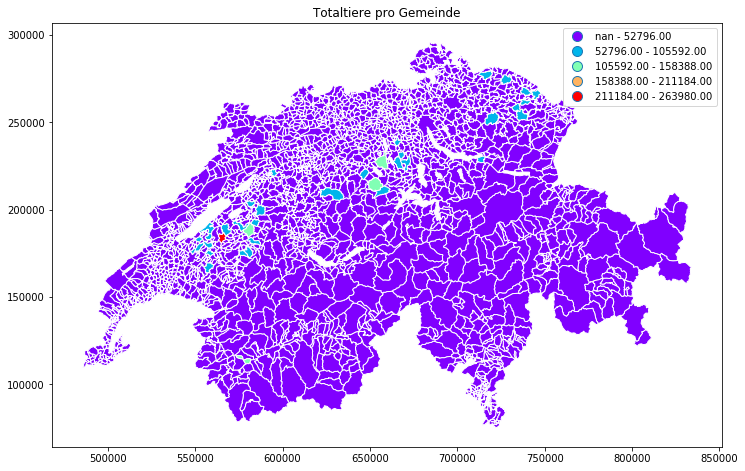

In [112]:
#Alletiere
alletotaltiere = ch.merge(totaltiere, how='left', left_on='GMDNAME', right_on="Ortsname")

ax = alletotaltiere.plot(column='Tiere 2017', cmap='rainbow', scheme='equal_interval', edgecolor='white', legend=True, figsize=(12,12))
ax.set_title('Totaltiere pro Gemeinde')

/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


Text(0.5, 1.0, 'Rinder pro Gemeinde')

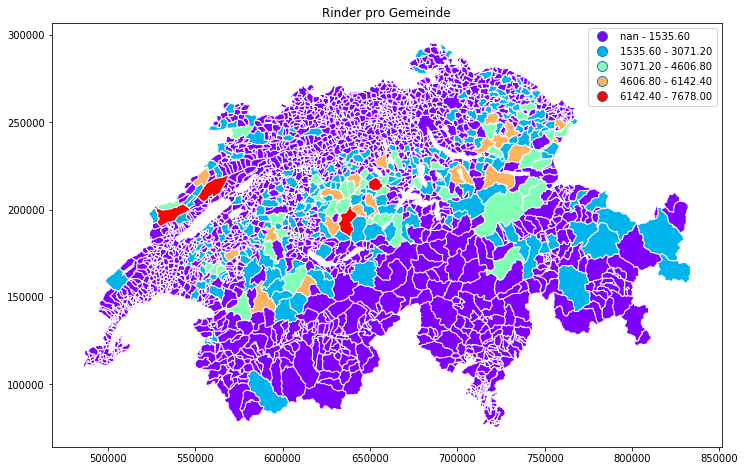

In [113]:
#Rinder
allerinder = ch.merge(rinder, how='left', left_on='GMDNAME', right_on="Ortsname")

ax = allerinder.plot(column='Tiere 2017', cmap='rainbow', scheme='equal_interval', edgecolor='white', legend=True, figsize=(12,12))
ax.set_title('Rinder pro Gemeinde')

/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


Text(0.5, 1.0, 'Pferde pro Gemeinde')

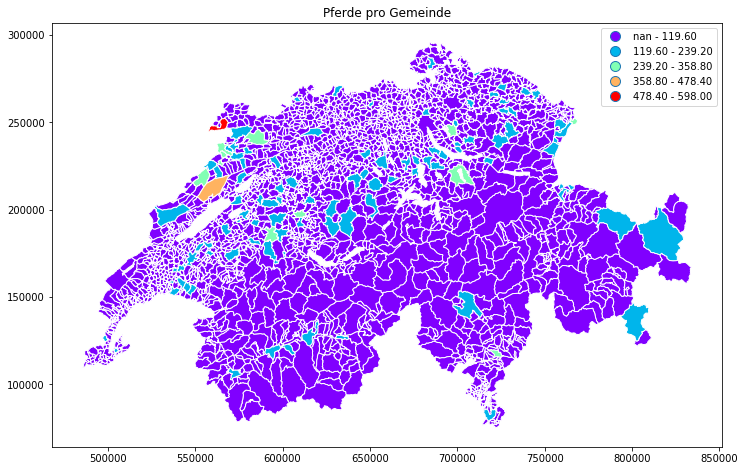

In [114]:
#Pferde
allepferde = ch.merge(pferde, how='left', left_on='GMDNAME', right_on="Ortsname")

ax = allepferde.plot(column='Tiere 2017', cmap='rainbow', scheme='equal_interval', edgecolor='white', legend=True, figsize=(12,12))
ax.set_title('Pferde pro Gemeinde')

/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


Text(0.5, 1.0, 'Schafe pro Gemeinde')

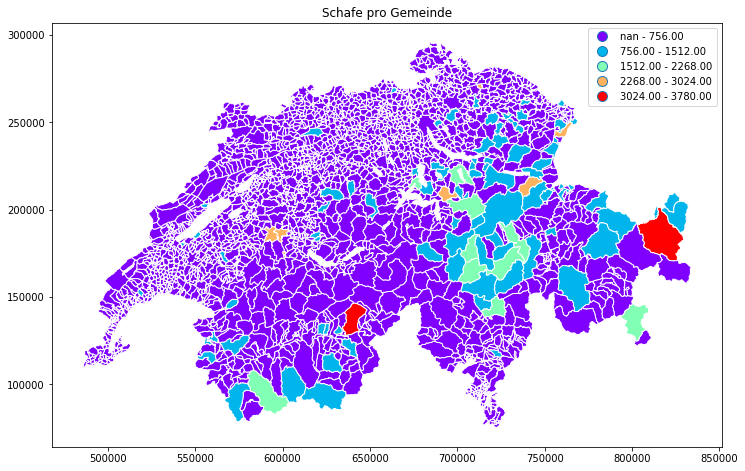

In [115]:
#Schafe
alleschafe = ch.merge(schafe, how='left', left_on='GMDNAME', right_on="Ortsname")

ax = alleschafe.plot(column='Tiere 2017', cmap='rainbow', scheme='equal_interval', edgecolor='white', legend=True, figsize=(12,12))
ax.set_title('Schafe pro Gemeinde')

/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


Text(0.5, 1.0, 'Ziegen pro Gemeinde')

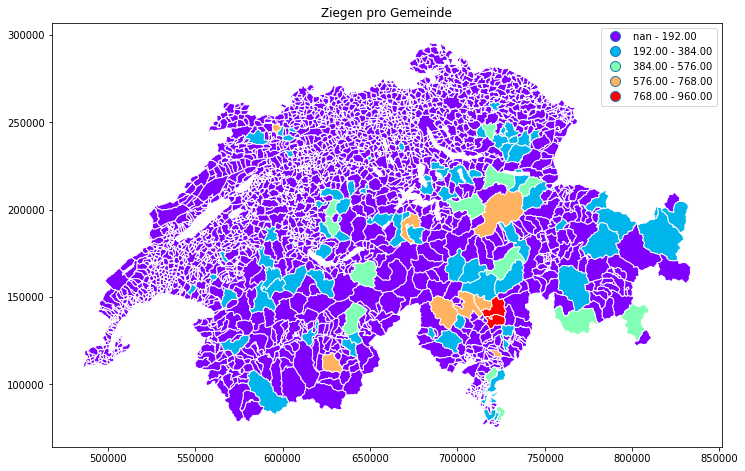

In [116]:
#Ziegen
alleziegen = ch.merge(ziegen, how='left', left_on='GMDNAME', right_on="Ortsname")

ax = alleziegen.plot(column='Tiere 2017', cmap='rainbow', scheme='equal_interval', edgecolor='white', legend=True, figsize=(12,12))
ax.set_title('Ziegen pro Gemeinde')

/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


Text(0.5, 1.0, 'Ziegen und Schafe pro Gemeinde')

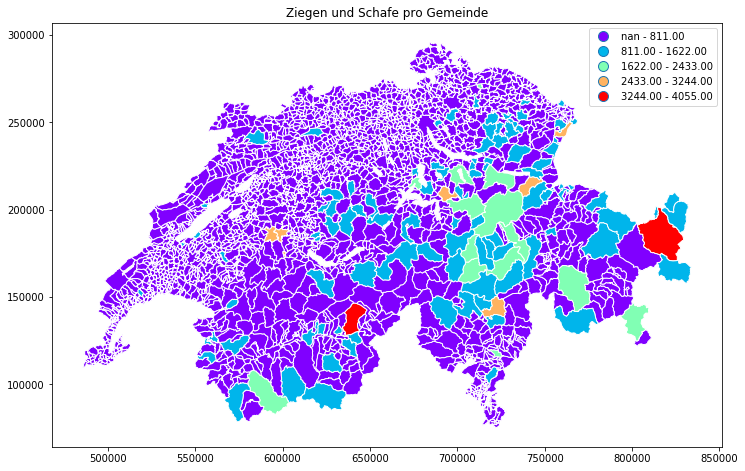

In [117]:
#Ziegen und Schafe
ziegenschafe = ch.merge(ziegenschafe, how='left', left_on='GMDNAME', right_on="Ortsname")

ax = ziegenschafe.plot(column='Tiere 2017', cmap='rainbow', scheme='equal_interval', edgecolor='white', legend=True, figsize=(12,12))
ax.set_title('Ziegen und Schafe pro Gemeinde')

/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


Text(0.5, 1.0, 'Schweine pro Gemeinde')

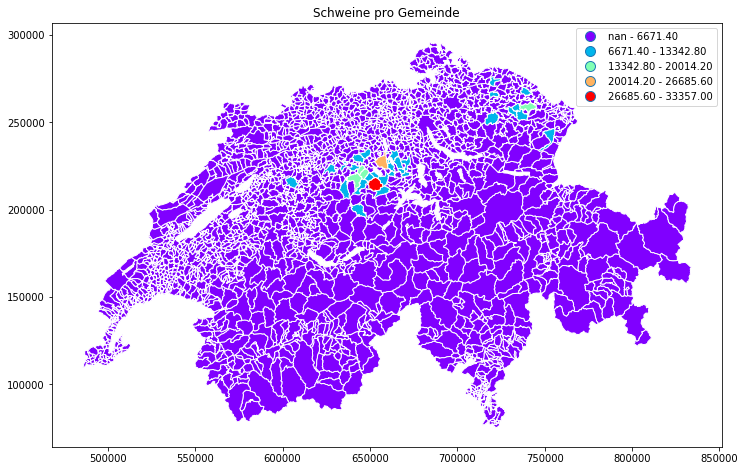

In [118]:
#Schweine
alleschweine = ch.merge(schweine, how='left', left_on='GMDNAME', right_on="Ortsname")

ax = alleschweine.plot(column='Tiere 2017', cmap='rainbow', scheme='equal_interval', edgecolor='white', legend=True, figsize=(12,12))
ax.set_title('Schweine pro Gemeinde')

/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/Fox/.virtualenvs/Hallo/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


Text(0.5, 1.0, 'Geflügel pro Gemeinde')

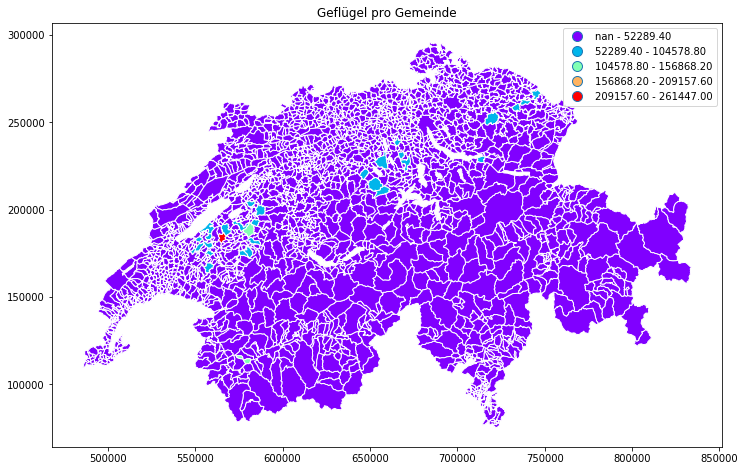

In [119]:
#Geflügel
allegeflügel = ch.merge(geflügel, how='left', left_on='GMDNAME', right_on="Ortsname")

ax = allegeflügel.plot(column='Tiere 2017', cmap='rainbow', scheme='equal_interval', edgecolor='white', legend=True, figsize=(12,12))
ax.set_title('Geflügel pro Gemeinde')

## Entwicklung der Nutztierbestände in der Schweiz

Für die Entwicklung der Tierbestände seit 1985, Daten vom bfs.

### Einlesen der Daten:

In [129]:
schweiztiere = pd.read_excel("schweiztieretotal.xlsx")

In [130]:
schweiztiere

,1985,1990,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018p,Veränderung 2017/2018p in %
Rindvieh¹),1848431,1858187,1747071,1672930,1640871,1608735,1588005,1611351,1593697,1570178,...,1591233,1577407,1564631,1557474,1562801,1554319,1555396,1544612,1544796,0.011912
Equideen2),37354,43807,51485,55211,56237,59800,62155,62581,64445,66777,...,82520,76212,78171,76889,76818,75118,75864,76209,80050,5.040087
Schweine,1966973,1775810,1379359,1394913,1486955,1453250,1498223,1547711,1556717,1528933,...,1588998,1578687,1544017,1484732,1498321,1495737,1453602,1444591,1419198,-1.757799
Schafe,271780,354582,418576,420350,422270,423521,420740,419995,429503,444811,...,434083,424018,417274,409493,402772,347025,338922,342419,343652,0.360085
Ziegen,53386,60764,56846,57966,60106,66007,66972,67693,70810,72531,...,86987,86215,88089,87935,87817,74269,75351,78146,80631,3.179945
Hühner,6237006,6446165,6237066,6352359,6565971,6731089,6789720,6807885,7206221,7444591,...,8943676,9390871,9878279,10003437,10644412,10752686,10893422,11408804,11535491,1.110432


## Plotten:

### Tabelle umstellen, damit ich die Grafik machen kann:
- x und y tauschen
- Spalten richtig benennen
- provisorische Zählung 2018 und Veränderung von 2017 bis 2018 weglassen

In [131]:
schweiztiere = schweiztiere.T.reset_index()
schweiztiere.columns = ['year', 'Rindvieh', 'Equideen', 'Schweine', 'Schafe', 'Ziegen', 'Hühner']
schweiztiere = schweiztiere.drop([24,25])
schweiztiere

,year,Rindvieh,Equideen,Schweine,Schafe,Ziegen,Hühner
0,1985,1848431.0,37354.0,1966973.0,271780.0,53386.0,6237006.0
1,1990,1858187.0,43807.0,1775810.0,354582.0,60764.0,6446165.0
2,1996,1747071.0,51485.0,1379359.0,418576.0,56846.0,6237066.0
3,1997,1672930.0,55211.0,1394913.0,420350.0,57966.0,6352359.0
4,1998,1640871.0,56237.0,1486955.0,422270.0,60106.0,6565971.0
5,1999,1608735.0,59800.0,1453250.0,423521.0,66007.0,6731089.0
6,2000,1588005.0,62155.0,1498223.0,420740.0,66972.0,6789720.0
7,2001,1611351.0,62581.0,1547711.0,419995.0,67693.0,6807885.0
8,2002,1593697.0,64445.0,1556717.0,429503.0,70810.0,7206221.0
9,2003,1570178.0,66777.0,1528933.0,444811.0,72531.0,7444591.0


### Grafik erstellen:

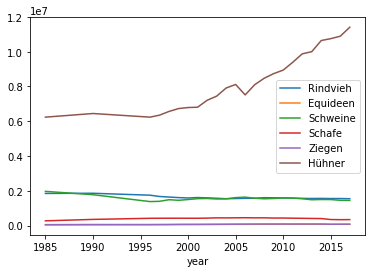

In [132]:
fig, ax = plt.subplots()

for tier in ['Rindvieh', 'Equideen', 'Schweine', 'Schafe', 'Ziegen', 'Hühner']:
    #print(df_transposed[tier])
    ax = schweiztiere.plot(ax=ax, kind='line', x='year', y=tier, label=tier)

plt.legend(loc='best')
plt.show()

#Es zeigt sich: So macht die Grafik wenig Sinn, ich suche einen anderen Darstellungsweg (Prozentveränderung und Kreisdiagramm im Illustrator). 

### File als csv speichern:

In [133]:
schweiztiere.to_csv("schweiztiereentwicklung.csv")